# K-means Clustering

#### Problem:

You own a mall and want to understand your customer base better i.e., identify Target Customers. This information will be given to the marketing team so they can plan the strategy accordingly.

#### Dataset:

This data set is for learning customer segmentation concepts, also known as market basket analysis. Available here: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMean
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv('Mall_Customers.csv', index_col = 0)
data.head()

# Target variable is Customer_type

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
# Need to encode categorical variable, Gender
label_encoded_data = data
label_encoded_data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
label_encoded_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [ ]:
onehot_encoded_data = data
onehot_encoded_data = pd.get_dummies(data, columns = ['Gender'])
onehot_encoded_data.head()  # So Gender_0 is male, Gender_1 is female

,Age,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1
CustomerID,,,,,
1,19,15,39,True,False
2,21,15,81,True,False
3,20,16,6,False,True
4,23,16,77,False,True
5,31,17,40,False,True


In [ ]:
# Renaming Gender_0 and Gender_1 columns
onehot_encoded_data.rename(columns = {'Gender_0': 'Male', 'Gender_1': 'Female'}, inplace = True)
onehot_encoded_data.head()

,Age,Annual Income (k$),Spending Score (1-100),Male,Female
CustomerID,,,,,
1,19,15,39,True,False
2,21,15,81,True,False
3,20,16,6,False,True
4,23,16,77,False,True
5,31,17,40,False,True


## Deciding what k to use

### Elbow Method

There is a value called the within-cluster sum of squares (WCSS) which measures the distances between data points and their centroids. When we use the elbow method, what we do is plot the number of clusters against the WCSS values and look for the point where there is a noticeable bend in our plot. It is important to note that WCSS generally decreases with increasing numbers of clusters. So we are not looking for the minimum WCSS but rather the "elbow" point which represents the optimal trade-off between the number of clusters and the compactness of clusters.


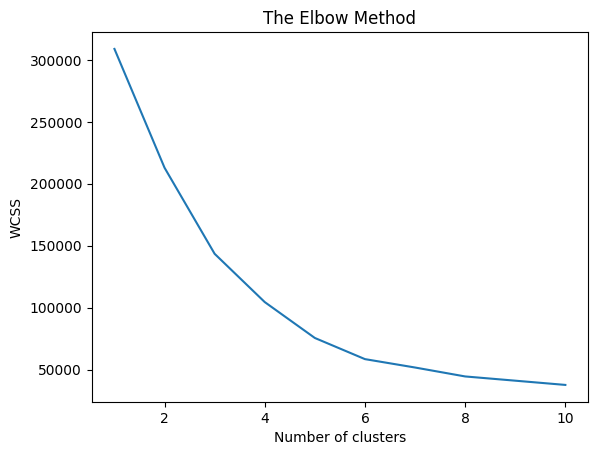

In [ ]:
# Deciding the number of clusters k; use elbow method
wcss = []

# For each n_clusters, i, get the inertia
for i in range(1, 11): # 1 to 10 clusters
        kmeans = KMeans(n_clusters = i, random_state = 42)
        kmeans.fit(onehot_encoded_data)
        wcss.append(kmeans.inertia_)

# visualisation
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


### Average Silhouette Method

The elbow method is not the only approach we can use. There is also the average silhouette method, where we look for the highest score.

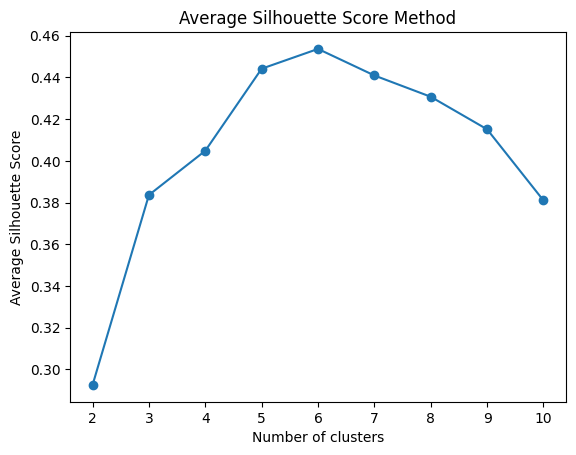

In [ ]:
silhouette_scores = []

# For each n_clusters, i, get the avg silhouette
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(onehot_encoded_data)

    silhouette_avg = silhouette_score(onehot_encoded_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# visualisation
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Score Method')
plt.show()

But there is more to this story...

More information on these techniques: https://medium.com/@megha.natarajan/deciphering-optimal-clusters-elbow-method-vs-silhouette-method-7e311c604201

In [ ]:
# OK, so we know k = 6 is optimal
# fit model
kmeans = KMeans(n_clusters = 6, random_state = 42)
kmeans.fit(onehot_encoded_data)

KMeans(n_clusters=6, random_state=42)

In [ ]:
# Add cluster labels column to the df (onehot_encoded_data)
onehot_encoded_data['Cluster'] = kmeans.labels_
onehot_encoded_data.head()

,Age,Annual Income (k$),Spending Score (1-100),Male,Female,Cluster
CustomerID,,,,,,
1,19,15,39,True,False,5
2,21,15,81,True,False,2
3,20,16,6,False,True,5
4,23,16,77,False,True,2
5,31,17,40,False,True,5


In [ ]:
# getting average attributes for each cluster
# grouping by cluster
cluster_groups = onehot_encoded_data.groupby('Cluster')

# Average attributes
cluster_groups.mean()


,Age,Annual Income (k$),Spending Score (1-100),Male,Female
Cluster,,,,,
0,32.692308,86.538462,82.128205,0.461538,0.538462
1,56.155556,53.377778,49.088889,0.444444,0.555556
2,25.272727,25.727273,79.363636,0.409091,0.590909
3,41.685714,88.228571,17.285714,0.571429,0.428571
4,27.000000,56.657895,49.131579,0.342105,0.657895
5,44.142857,25.142857,19.523810,0.380952,0.619048


In [ ]:
# Getting the mode for the True/False columns instead
# lambda and agg function; lambda because simple expressions, could define function though

cluster_summary = onehot_encoded_data.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Male': lambda x: x.mode(),
    'Female': lambda x: x.mode()
})

cluster_summary

,Age,Annual Income (k$),Spending Score (1-100),Male,Female
Cluster,,,,,
0,32.692308,86.538462,82.128205,False,True
1,56.155556,53.377778,49.088889,False,True
2,25.272727,25.727273,79.363636,False,True
3,41.685714,88.228571,17.285714,True,False
4,27.000000,56.657895,49.131579,False,True
5,44.142857,25.142857,19.523810,False,True
